# Dataset Wrangling and EDA
This notebook is used for:
1. Consolidating various datasets into one
2. Converting the dataset into a more standard format
3. Simple feature expansion (bad name?)
4. Exploratory Data Analysis

### Declaring Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib import ticker

eu_data = [['Austria', 'AT'], ['Belgium', 'BE'], ['Bulgaria', 'BG'], ['Croatia', 'HR'], ['Cyprus', 'CY'], ['Czechia', 'CZ'], ['Denmark', 'DK'], ['Estonia', 'EE'], ['Finland', 'FI'], ['France', 'FR'], ['Germany', 'DE'], ['Greece', 'EL'], ['Hungary', 'HU'], ['Ireland', 'IE'], ['Italy', 'IT'], ['Latvia', 'LV'], ['Lithuania', 'LT'], ['Luxembourg', 'LU'], ['Malta', 'MT'], ['Netherlands', 'NL'], ['Poland', 'PL'], ['Portugal', 'PT'], ['Romania', 'RO'], ['Slovakia', 'SK'], ['Slovenia', 'SI'], ['Spain', 'ES'], ['Sweden', 'SE'], ['United Kingdom', 'UK'], ['Iceland', 'IS'], ['Liechtenstein', 'LI'], ['Norway', 'NO'], ['Switzerland', 'CH'], ['Montenegro', 'ME']]
eu_codes = pd.DataFrame(eu_data, columns=['full', 'abbr'])
eu_codes = eu_codes.set_index(eu_codes['abbr'])
eu_codes = eu_codes.drop('abbr', axis=1)

### Color Palette & Typeface Sizing

In [2]:
YELLOW = '#F2DC5D'
GREEN = '#9BC53D'
RED = '#C3423F'
LIGHT_BLUE = '#2596BE'
GRAY = '#666666'

AXIS_SIZE = 12
TITLE_SIZE = 16
DESCRIPTION_SIZE = 9
FIGURE_SIZE = (10*2/3,6*2/3)

Consolidating various datasets into one

## Exploratory Data Analysis
### Importing formatted dataset

In [163]:
df = pd.read_csv('../data/final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'GENCONV': "Int64", 'HUMSTAT': "Int64", 'SUB_PROT': "Int64", 'REJECTED': "Int64", 'TOTAL_POS': "Int64", 'TOTAL_APPS': "Int64", "POS_RATE": "Float64"}, keep_default_na=False, na_values=['nan'])

##remove partial 2023-Q3 Data
df = df[df["TIME_PERIOD"] != "2023-Q3"]

#fill humstat
#df["TOTAL_POS"] = df["TOTAL_POS"].fillna(0)
df = df.fillna(0)

#fix math from previous time
df["TOTAL_POS"] = df["GENCONV"] + df["HUMSTAT"] + df["SUB_PROT"]
df["TOTAL_APPS"] = df["TOTAL_POS"] + df["REJECTED"]
df = df.drop('POS_RATE', axis=1)

df

,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_POS,TOTAL_APPS
0,AD,F,UNK,AT,2008-Q1,0,0,0,0,0,0
1,AD,F,UNK,AT,2008-Q2,0,0,0,0,0,0
2,AD,F,UNK,AT,2008-Q3,0,0,0,0,0,0
3,AD,F,UNK,AT,2008-Q4,0,0,0,0,0,0
4,AD,F,UNK,AT,2009-Q1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0,0,0
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0,0,0
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0,0,0
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0,0,0


### Asylum Applications Over Time

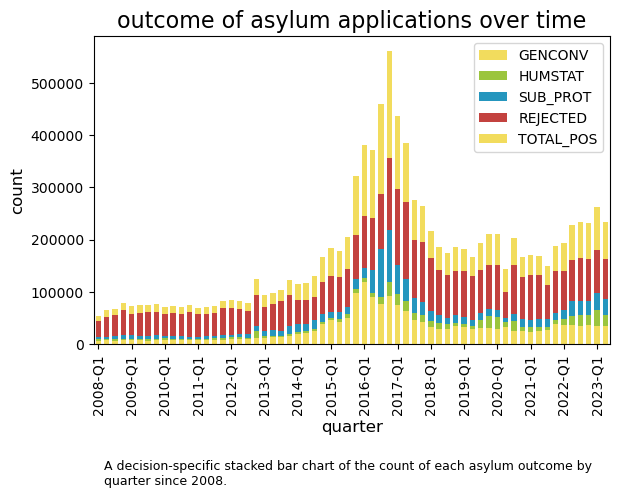

In [27]:
fig_title = "asylum-outcomes-over-time.png"
fig_description="""A decision-specific stacked bar chart of the count of each asylum outcome by 
quarter since 2008."""

decisions_by_time = df.groupby(['TIME_PERIOD']).sum(numeric_only=True).drop("TOTAL_APPS", axis=1).drop("POS_RATE", axis=1)
decisions_by_time.plot(kind='bar', stacked=True,figsize=FIGURE_SIZE, width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('count', fontsize=AXIS_SIZE)
plt.title('outcome of asylum applications over time', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.18, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

### Total Accepted & Rejected Applications Each Quarter

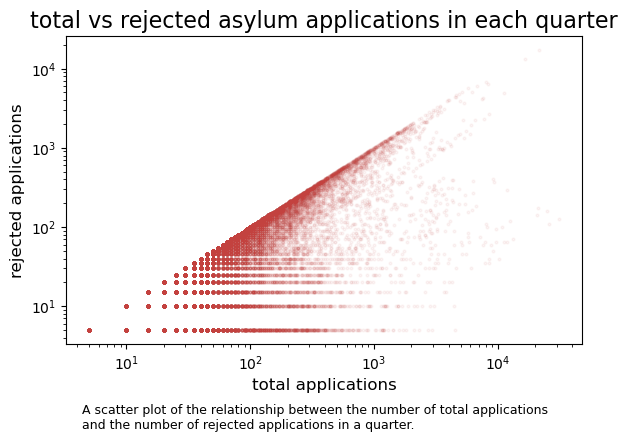

In [5]:
fig_title = "rejected-vs-total-scatter.png"
fig_description="""A scatter plot of the relationship between the number of total applications 
and the number of rejected applications in a quarter."""

df.plot.scatter('TOTAL_APPS','REJECTED',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=RED) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('rejected applications', fontsize=AXIS_SIZE)
plt.title("total vs rejected asylum applications each quarter", fontsize=TITLE_SIZE)


plt.figtext(0.15, -0.04, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

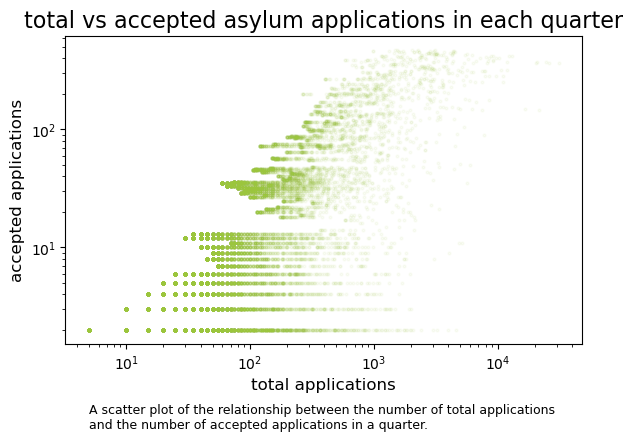

In [6]:
fig_title = "accepted-vs-total-scatter.png"
fig_description="""A scatter plot of the relationship between the number of total applications 
and the number of accepted applications in a quarter."""

df.plot.scatter('TOTAL_APPS','TOTAL_POS',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=GREEN) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('accepted applications', fontsize=AXIS_SIZE)
plt.title("total vs accepted asylum applications each quarter", fontsize=TITLE_SIZE)

plt.figtext(0.16, -0.04, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

### Accepted Applications Over Time by Country of Asylum

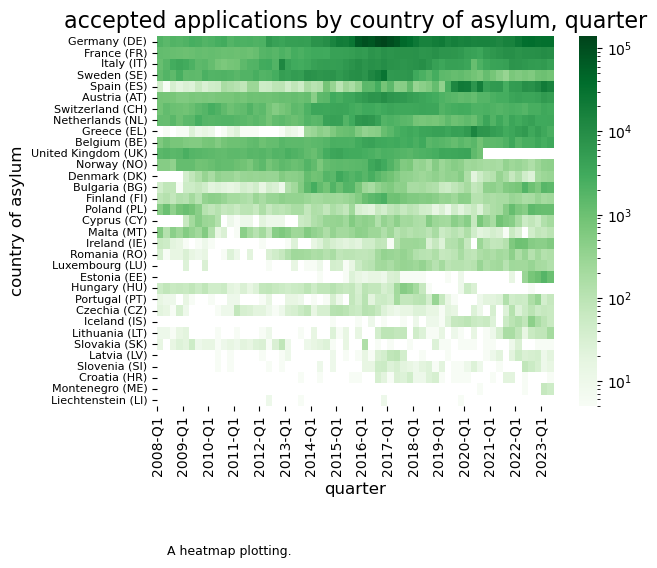

In [167]:
fig_title = "accepted-by-country-heatmap.png"
fig_description="""A heatmap plotting."""

accepted_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["TOTAL_POS"].astype(float).unstack()
#remove nans
accepted_by_country = accepted_by_country.fillna(0)
#remove non-accepting countries
MIN_ACCEPTED = 0
accepted_by_country = accepted_by_country[accepted_by_country.sum(axis=1) > MIN_ACCEPTED]
#sort rows by average value (bc they're categorical)
countries_by_average = accepted_by_country.mean(axis=1).sort_values(ascending=False).index
accepted_by_country = accepted_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(accepted_by_country, norm=LogNorm(), cmap="Greens")

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of asylum', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('accepted applications by country of asylum, quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.18, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

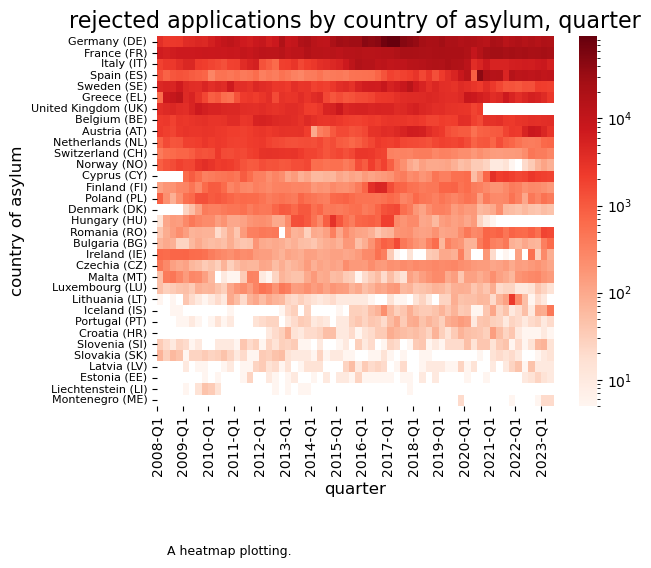

In [168]:
fig_title = "rejected-by-country-heatmap.png"
fig_description="""A heatmap plotting."""

rejected_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["REJECTED"].astype(float).unstack()
#remove nans
rejected_by_country = rejected_by_country.fillna(0)
#remove non-accepting countries
MIN_REJECTED = 0
rejected_by_country = rejected_by_country[rejected_by_country.sum(axis=1) > MIN_REJECTED]
#sort rows by average value (bc they're categorical)
countries_by_average = rejected_by_country.mean(axis=1).sort_values(ascending=False).index
rejected_by_country = rejected_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(rejected_by_country, norm=LogNorm(), cmap="Reds")

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of asylum', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('rejected applications by country of asylum, quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.18, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()